In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sy 

def f(x): 
    return 0.0032*(300-x)*(x-250)
  
x = sy.Symbol("x") 
print(sy.integrate(f(x), (x, 250, 300)))

66.6666666666642


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

def f(x):
    return 0.0032 * (300 - x) * (x - 250)*x

x = sy.Symbol("x")
print(sy.integrate(f(x), (x, 250, 300)))

18333.3333333349


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

def f(x):
    return 0.0032 * (300 - x) * (x - 250)*x**2
x = sy.Symbol("x")
print(sy.integrate(f(x), (x, 250, 300)))

5049999.99999976


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

def f(x):
    return 0.0032 * (300 - x) * (x - 250)*x**3

x = sy.Symbol("x")
print(sy.integrate(f(x), (x, 250, 300)))

1393333333.33337


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

def f(x):
    return 0.0032 * (300 - x) * (x - 250)*x**4

x = sy.Symbol("x")
print(sy.integrate(f(x), (x, 250, 300)))

385059523809.539


In [6]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline


def generateODE(t, y):
    # Unpack the variables from the y vector
    m0p, m1p, m2p, m3p, m4p, m0, m1, m2, m3, m4, C = y
    
    
    g = 1.5
    kg = 1.44*10**8                                    # mum/sec
    kb = 285.1                                        #  no./(microm^3 sec)
    b = 2.25                                     
    rho_c = 2.66*10**(-12)                             # g/microm^3
    
    # M = 3000                                            # g
    # C_c = rho_c/MW                                     # mol/m^3
    
    k_v = 1.5
    Eg = 4859                                                     # Eg/R k
    Eb = 7517                                                        # Eb/R  k
    
    
    # Calculate temperature T
    #print(t)
    
    T = 323.15 - (20) * (t/1800)
    #print(T)
    
    # Calculate other necessary quantities based on y and T
    
    
    C_sat = 6.29 * 10**(-2) + 2.46 * 10**(-3)*T - 7.14*10**(-6)*T**2          #g/g sol
    
    #print(C_sat)
    
    delta_C = max(C - C_sat, 0)
    
    #print(delta_C/C_sat)

    G = kg*(np.exp(-Eg/T))*(delta_C/C_sat)**g                                # mum/sec   
    
    #print(G)
    
    B = kb*(np.exp(-Eb/T))*(delta_C/C_sat)**b*(m3)                          # no./sec      
    

    # Define your differential equations using y, C, T, and other quantities
    
    
    dm0p = 0
    dm1p = G * m0p
    dm2p = 2 * G * m1p 
    dm3p = 3 * G * m2p 
    dm4p = 4 * G * m3p
    
    dm0 = B
    dm1 = G * m0 
    dm2 = 2 * G * m1 
    dm3 = 3 * G * m2 
    dm4 = 4 * G * m3
    dC = -3 * rho_c * G * k_v * (m2 + m2p)
    
    
   
    return [dm0p, dm1p, dm2p, dm3p, dm4p, dm0, dm1, dm2, dm3, dm4, dC]

# Initial conditions
initialConditions = [66.66, 18333.3, 5.05*10**6, 1.39*10**9, 3.85*10**11, 0, 0, 0, 0, 0, 0.1743]

# Parameters
# Define your parameters here

t_span = (0, 1800)
num_points = 30

sol1 = solve_ivp(
    lambda t, y: generateODE(t, y),
    t_span,
    initialConditions,
    
    t_eval=np.linspace(0, 30, num_points)
)

Text(0, 0.5, 'concentration (g/g)')

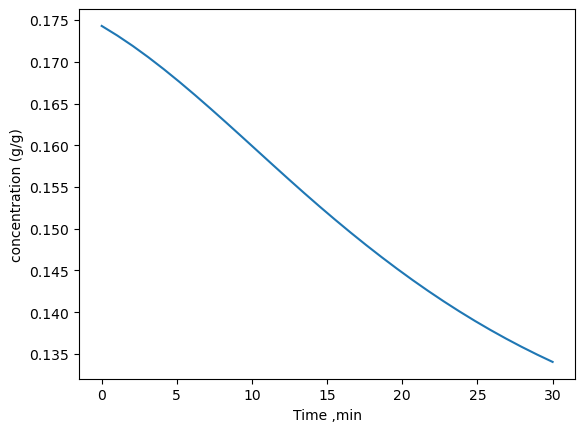

In [8]:
plt.plot(sol1.t,sol1.y[10])
plt.xlabel("Time ,min")
plt.ylabel("concentration (g/g)")

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sy 

def f(x): 
    return 0.2347*x**2 - 0.1357*x + 0.0307
  
x = sy.Symbol("x") 
print(sy.integrate(f(x), (x, 0.4, 0.98)))

0.0321245141333333
